Load all packages you need.

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Read the data.

In [25]:
df = pd.read_csv('../data/diabetes.csv')
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)

Let's deal with the missing data points in "BloodPressure". <br>
First remove the outlier from the last coding break.<br>
Create a copy of the outlier-filtered data frame and impute the missing values with the "BloodPressure" median value.

In [26]:
df_a = df.copy()
df_a['BloodPressure'] = df_a['BloodPressure'].fillna(df_a['BloodPressure'].median())

Create a second copy of the outlier-filtered data frame. <br>
Perform a hot-deck/distribution imputation. First, estimate the distribution parameters of "BloodPressure". Then, sample the values used for imputation.

In [27]:
df_b = df.copy()
df_b['BloodPressure'] = df_b['BloodPressure'].fillna(df_b['BloodPressure'].median())

Create a third copy of the outlier-filtered data frame. <br>
Perform a regression-based imputation. First, choose 3 variables that are correlated with "BloodPressure" (Hint, create a correlation matrix or have a look at the "Associations"-Button in sweetviz).<br>
Second, fit a linear regression model with those three variables as predictors. Let's ignore for the moment that the other variables might also include outlier and missing data.<br>
Now, use the regression model to estimate the imputed value for each missing data point.

In [28]:
df_c = df.copy()
df_c['BloodPressure'] = (df_c['BloodPressure']
                         .apply(lambda x:
                            np.random.choice(df_c['BloodPressure'].dropna()) if pd.isna(x) else x))

Now plot the original data next to the imputed data. Inspect the differences!

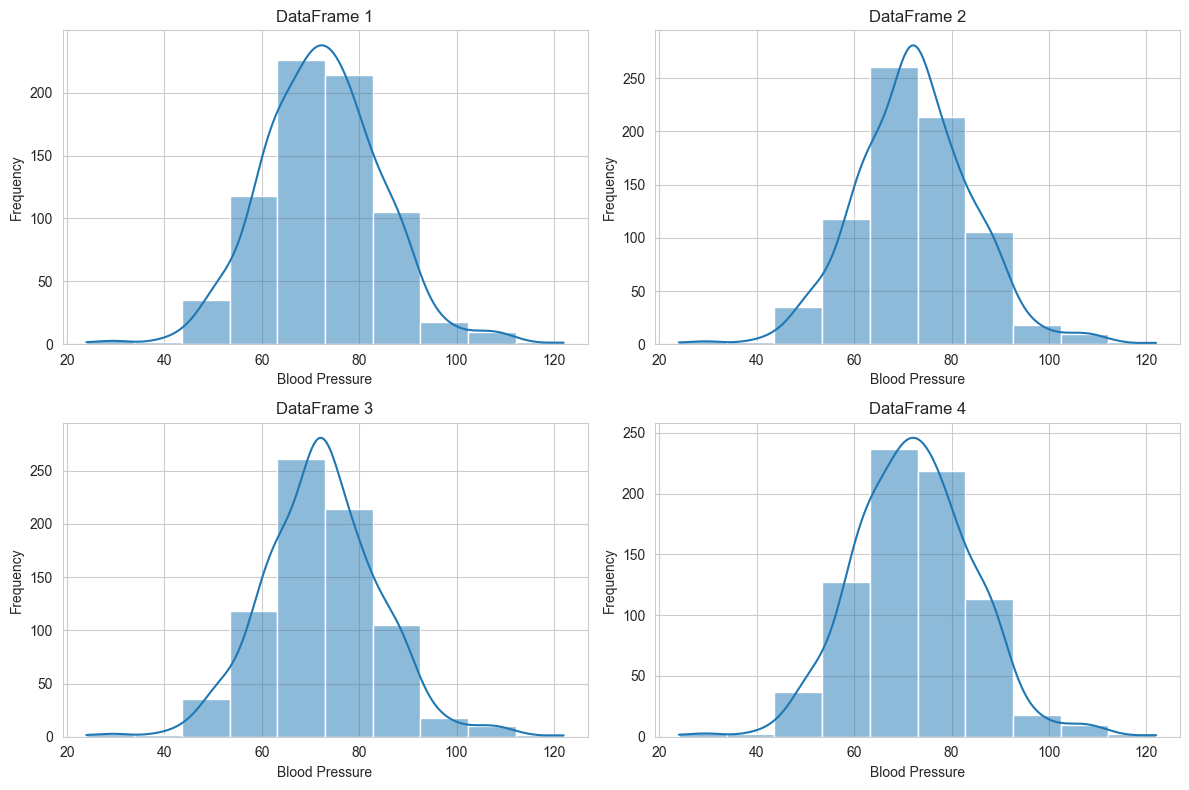

In [29]:
dataframes = [df, df_a, df_b, df_c]
labels = ['Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset 4']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2x2 grid of subplots
axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

# Plot a histogram for each DataFrame in a separate subplot
for i, df in enumerate(dataframes):
    sns.histplot(df['BloodPressure'], bins=10, kde=True, ax=axes[i])
    axes[i].set_title(f'DataFrame {i + 1}')  # Set a title for each subplot
    axes[i].set_xlabel('Blood Pressure')    # Set x-axis label
    axes[i].set_ylabel('Frequency')         # Set y-axis label

# Adjust layout
plt.tight_layout()
plt.show()

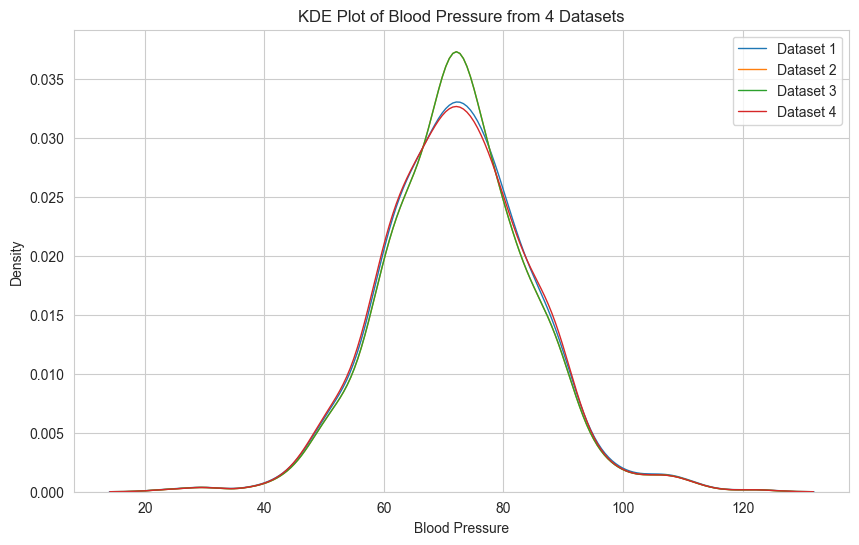

In [31]:
# Plot KDE lines for all datasets on a single plot
plt.figure(figsize=(10, 6))
for df, label in zip(dataframes, labels):
    sns.kdeplot(df['BloodPressure'], label=label, alpha=1, linewidth=1)

# Add labels, title, and legend
plt.xlabel('Blood Pressure')
plt.ylabel('Density')
plt.title('KDE Plot of Blood Pressure from 4 Datasets')
plt.legend()

# Show the plot
plt.show()